In [40]:
pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import numpy as np


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [42]:
dataset_path = os.listdir('/content/dataset')
print (dataset_path)
print("Types of classes labels found: ", len(dataset_path))

['aeroplane', 'tank', '.ipynb_checkpoints']
Types of classes labels found:  3


In [43]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir( '/content/dataset'+ '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [44]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

      Labels                                   image
0  aeroplane  dataset_path/aeroplane/TF_PLANE_17.jpg
1  aeroplane   dataset_path/aeroplane/TF_PLANE_2.jpg
2  aeroplane  dataset_path/aeroplane/TF_PLANE_25.jpg
3  aeroplane         dataset_path/aeroplane/d29.jpeg
4  aeroplane  dataset_path/aeroplane/TF_PLANE_23.jpg
    Labels                             image
129   tank  dataset_path/tank/bmpt_72_l3.jpg
130   tank         dataset_path/tank/d4.jpeg
131   tank        dataset_path/tank/d22.jpeg
132   tank        dataset_path/tank/d16.jpeg
133   tank        dataset_path/tank/d20.jpeg


In [45]:
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  134
tank         68
aeroplane    66
Name: Labels, dtype: int64


In [46]:
import cv2
path = '/content/dataset/'
dataset_path = os.listdir('/content/dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [47]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(134, 224, 224, 3)

In [48]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane'
 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane'
 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane'
 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane'
 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane'
 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane'
 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane'
 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane'
 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane'
 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane'
 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane' 'aeroplane'
 'tank' 'tank' 'tank' 'tank' 'tank' 'tank' 'tank' 'tank' 'tank' 'tank'
 'tank' 'tank' 'tank' 'tank' 'tank' 'tank' 'tank' 'tank' 'tank' 'tank'
 'tank' 'tank' 'tank' 'tank' 'tank' 'tank' 'tank' 'tank

In [49]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [50]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)
train_x = np.array(train_x)
train_y = np.array(train_y)
#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(127, 224, 224, 3)
(127, 2)
(7, 224, 224, 3)
(7, 2)


In [51]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Load the EfficientNetB0 model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=inputs, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the base model's layers
base_model.trainable = True

# Add additional layers on top of the base model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

hist = model.fit(train_x, train_y, epochs=5, verbose=1)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

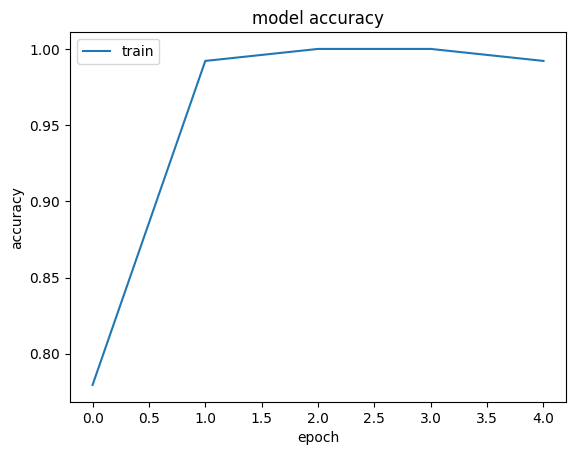

In [52]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [53]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

#print(test_x, test_y)

1/1 [==============================] - 4s 4s/step - loss: 0.9804 - accuracy: 0.5714
Loss = 0.9803794622421265
Test Accuracy = 0.5714285969734192


Input image shape: (1, 224, 224, 3)


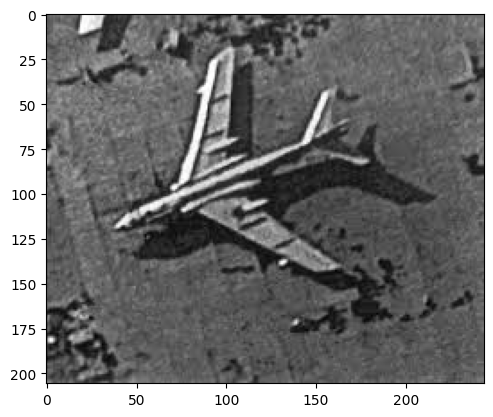

In [62]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/i9.jpeg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [63]:

# Make prediction
preds = model.predict(x)
preds
ans = preds
if ans[0][0] > ans[0][1]:
  ans = "aeroplane"
else:
  ans = "tank"
print(preds)
print(ans)



        
   
  

1/1 [==============================] - 0s 95ms/step
[[9.995216e-01 4.783613e-04]]
aeroplane


In [56]:
#tf.saved_model.save(model, './')
# saving and loading the .h5 model

# save model
model.save('m1.h5')
print('Model Saved!')

# load model



Model Saved!


In [57]:
!pwd

/content
